# Train CNN with MFCCs + Delta + Delta-Delta


## cnn_mfccs_delta


Inspired by https://arxiv.org/pdf/1912.10458


Import the necessary libraries


In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import os
import sys
import numpy as np
import random

In [2]:
# Get the absolute path to the project root without relying on __file__
notebook_path = os.getcwd()  # Gets current working directory
project_root = os.path.abspath(os.path.join(notebook_path, "../../.."))
sys.path.insert(0, project_root)

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1+cu118
True


Set the seed for reproducibility


In [4]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [5]:
model_name = 'cnn_mfccs_delta_zero'

train_csv = '../../../data/mfcc_delta_train_dataset.csv'
test_csv = '../../../data/mfcc_delta_test_dataset.csv'
val_csv = '../../../data/mfcc_delta_val_dataset.csv'
root_dir = '../../../data/'
class_weights_path = '../../../data/class_weights.pt'

Import other helper classes


In [6]:
from cnn.datasets.MfccDeltaDataset import MFCCDeltaDataset
from cnn.pipeline.Pipeline import Pipeline

Import the model


In [7]:
from cnn.models.architectures.CNNMFCCsDelta import CNNMFCCsDelta

model = CNNMFCCsDelta()

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNMFCCsDelta(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=2560, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=9, bias=True)
)

Visualize the model


In [8]:
summary(model, (3, 40, 172))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 16, 40, 172]             448
         MaxPool2d-2           [-1, 16, 20, 86]               0
            Conv2d-3           [-1, 32, 20, 86]           4,640
         MaxPool2d-4           [-1, 32, 10, 43]               0
            Conv2d-5           [-1, 64, 10, 43]          18,496
         MaxPool2d-6            [-1, 64, 5, 21]               0
            Conv2d-7           [-1, 128, 5, 21]          73,856
         MaxPool2d-8           [-1, 128, 2, 10]               0
           Dropout-9           [-1, 128, 2, 10]               0
           Linear-10                  [-1, 128]         327,808
          Dropout-11                  [-1, 128]               0
           Linear-12                   [-1, 64]           8,256
           Linear-13                    [-1, 9]             585
Total params: 434,089
Trainable params:

Define the learning rate, criterion, optimizer, transformations, and number of epochs


In [9]:
learning_rate = 0.001

class_weights = torch.load(class_weights_path).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define transformations
transform = transforms.Compose([])

num_epochs = 100

Prepare datasets and dataloaders


In [12]:
trainset = MFCCDeltaDataset(
    csv_file=train_csv, root_dir=root_dir, transform=transform)
valset = MFCCDeltaDataset(
    csv_file=val_csv, root_dir=root_dir, transform=transform)
testset = MFCCDeltaDataset(
    csv_file=test_csv, root_dir=root_dir, transform=transform)

trainloader = DataLoader(trainset, batch_size=128,
                         shuffle=True, num_workers=4, pin_memory=True)
valloader = DataLoader(valset, batch_size=128,
                       shuffle=False, num_workers=4, pin_memory=True)
testloader = DataLoader(testset, batch_size=128,
                        shuffle=False, num_workers=4, pin_memory=True)

Execute the pipeline


Mapping from Emotion to Number: {'Anger': 0, 'Bored': 1, 'Disgust': 2, 'Fear': 3, 'Happy': 4, 'Neutral': 5, 'Question': 6, 'Sad': 7, 'Surprise': 8}
Model is on: cuda:0
Epoch 1/100


Validating: 100%|██████████| 75/75 [00:03<00:00, 19.80it/s, Loss=1.2159117460250854, Elapsed=3.8566s, ETA=0.0000s]

Epoch 1 completed in 21.2562s
Train Loss: 1.394977316001936 - Train Accuracy: 37.89376088283847
Validation Loss: 1.1042508443196615 - Validation Accuracy: 49.725622625580414

Epoch 2/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.35it/s, Loss=1.2103930711746216, Elapsed=2.3195s, ETA=0.0000s]


Epoch 2 completed in 12.1489s
Train Loss: 1.0273368644576542 - Train Accuracy: 53.37509328147261
Validation Loss: 0.9664676388104757 - Validation Accuracy: 57.41874208526805

Epoch 3/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 36.23it/s, Loss=0.9990113973617554, Elapsed=2.1394s, ETA=0.0000s]

Epoch 3 completed in 11.8411s
Train Loss: 0.9135023420945757 - Train Accuracy: 58.266434499445964
Validation Loss: 0.8747086262702942 - Validation Accuracy: 60.93288307302659

Epoch 4/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 35.33it/s, Loss=0.8807491064071655, Elapsed=2.2070s, ETA=0.0000s]

Epoch 4 completed in 11.5465s
Train Loss: 0.8381434675586017 - Train Accuracy: 61.83261346419122
Validation Loss: 0.8413089434305827 - Validation Accuracy: 64.57365977205572

Epoch 5/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 32.58it/s, Loss=0.6661425828933716, Elapsed=2.3819s, ETA=0.0000s]

Epoch 5 completed in 12.4711s
Train Loss: 0.7827680507147243 - Train Accuracy: 64.32464213835057
Validation Loss: 0.8002528524398804 - Validation Accuracy: 65.72393414943014

Epoch 6/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.32it/s, Loss=0.9731578826904297, Elapsed=2.3211s, ETA=0.0000s]

Epoch 6 completed in 12.3949s
Train Loss: 0.7334679527089775 - Train Accuracy: 66.57244295696614
Validation Loss: 0.8045663054784139 - Validation Accuracy: 67.12747994934571

EarlyStopping counter: 1/7
Epoch 7/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.90it/s, Loss=0.7170042395591736, Elapsed=2.2794s, ETA=0.0000s]


Epoch 7 completed in 12.1580s
Train Loss: 0.6876467406921993 - Train Accuracy: 68.38606092128174
Validation Loss: 0.7734205532073974 - Validation Accuracy: 66.63149008020261

Epoch 8/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 32.93it/s, Loss=0.4675527811050415, Elapsed=2.3553s, ETA=0.0000s]

Epoch 8 completed in 12.6929s
Train Loss: 0.6441145947558342 - Train Accuracy: 70.20194025463016
Validation Loss: 0.746480872631073 - Validation Accuracy: 68.615449556775

Epoch 9/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 30.86it/s, Loss=0.2093304693698883, Elapsed=2.5107s, ETA=0.0000s]


Epoch 9 completed in 12.3303s
Train Loss: 0.6033909630051927 - Train Accuracy: 71.95450125505981
Validation Loss: 0.7366799795627594 - Validation Accuracy: 68.34107218235542

Epoch 10/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 32.10it/s, Loss=0.4346497058868408, Elapsed=2.4053s, ETA=0.0000s] 

Epoch 10 completed in 12.0506s
Train Loss: 0.568624815069182 - Train Accuracy: 73.2208679134348
Validation Loss: 0.7422789351145427 - Validation Accuracy: 69.93457154917687

EarlyStopping counter: 1/7
Epoch 11/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 37.29it/s, Loss=0.6313328742980957, Elapsed=2.0927s, ETA=0.0000s] 

Epoch 11 completed in 13.1741s
Train Loss: 0.5338206099981517 - Train Accuracy: 74.57316659505665
Validation Loss: 0.7627634636561076 - Validation Accuracy: 70.13507809202196

EarlyStopping counter: 2/7
Epoch 12/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.03it/s, Loss=0.44046953320503235, Elapsed=2.3398s, ETA=0.0000s]


Epoch 12 completed in 12.2513s
Train Loss: 0.5056998430821248 - Train Accuracy: 75.97295402636757
Validation Loss: 0.7501357714335124 - Validation Accuracy: 72.26677923174336

EarlyStopping counter: 3/7
Epoch 13/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 31.65it/s, Loss=0.38830065727233887, Elapsed=2.4476s, ETA=0.0000s]

Epoch 13 completed in 12.2328s
Train Loss: 0.4755782559944715 - Train Accuracy: 77.37952556477691
Validation Loss: 0.8179275409380595 - Validation Accuracy: 69.82904178978472

EarlyStopping counter: 4/7
Epoch 14/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 34.96it/s, Loss=0.4299148917198181, Elapsed=2.2143s, ETA=0.0000s]

Epoch 14 completed in 12.1305s
Train Loss: 0.44881665431006107 - Train Accuracy: 78.43106216503472
Validation Loss: 0.8128165817260742 - Validation Accuracy: 71.88687209793162

EarlyStopping counter: 5/7
Epoch 15/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 34.96it/s, Loss=0.6473670601844788, Elapsed=2.2258s, ETA=0.0000s] 


Epoch 15 completed in 11.7693s
Train Loss: 0.41731772963711294 - Train Accuracy: 79.43511001560346
Validation Loss: 0.8694132109483083 - Validation Accuracy: 73.03714647530603

EarlyStopping counter: 6/7
Epoch 16/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 34.56it/s, Loss=1.0660851001739502, Elapsed=2.2523s, ETA=0.0000s]


Epoch 16 completed in 12.0486s
Train Loss: 0.4024633713109645 - Train Accuracy: 80.23337328418624
Validation Loss: 0.8547392483552297 - Validation Accuracy: 72.98438159560996

EarlyStopping counter: 7/7
🔁 Early stopping triggered!


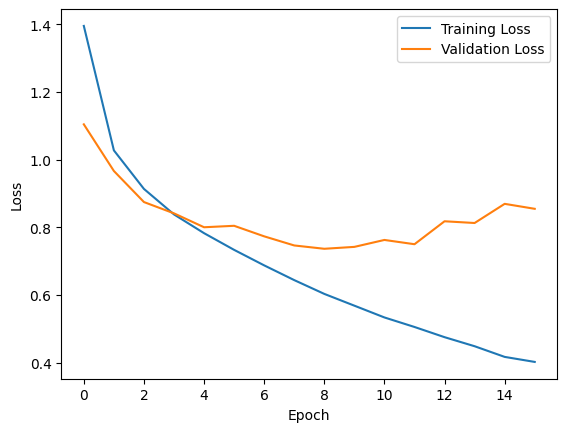

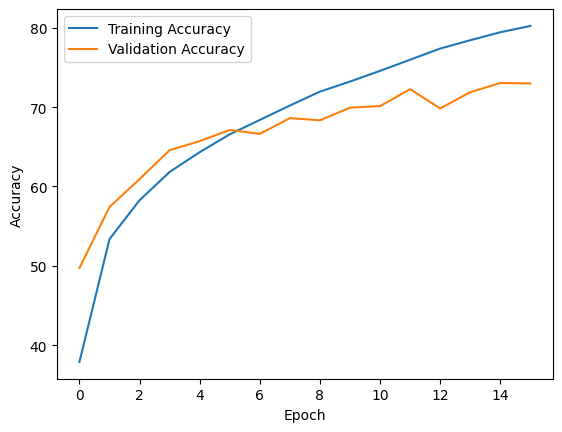

Evaluating best model on test set...


Testing: 100%|██████████| 75/75 [00:03<00:00, 18.87it/s]


Test Accuracy: 0.7155
Test Precision: 0.7346
Test Recall: 0.7155
Test F1-score: 0.7154

              precision    recall  f1-score   support

       Anger       0.67      0.76      0.71       916
       Bored       0.72      0.94      0.82      1098
     Disgust       0.49      0.62      0.55       291
        Fear       0.37      0.74      0.49       308
       Happy       0.81      0.59      0.68      1914
     Neutral       0.74      0.60      0.66      2226
    Question       0.84      0.89      0.87      1139
         Sad       0.76      0.70      0.73       857
    Surprise       0.69      0.77      0.72       728

    accuracy                           0.72      9477
   macro avg       0.68      0.74      0.69      9477
weighted avg       0.73      0.72      0.72      9477



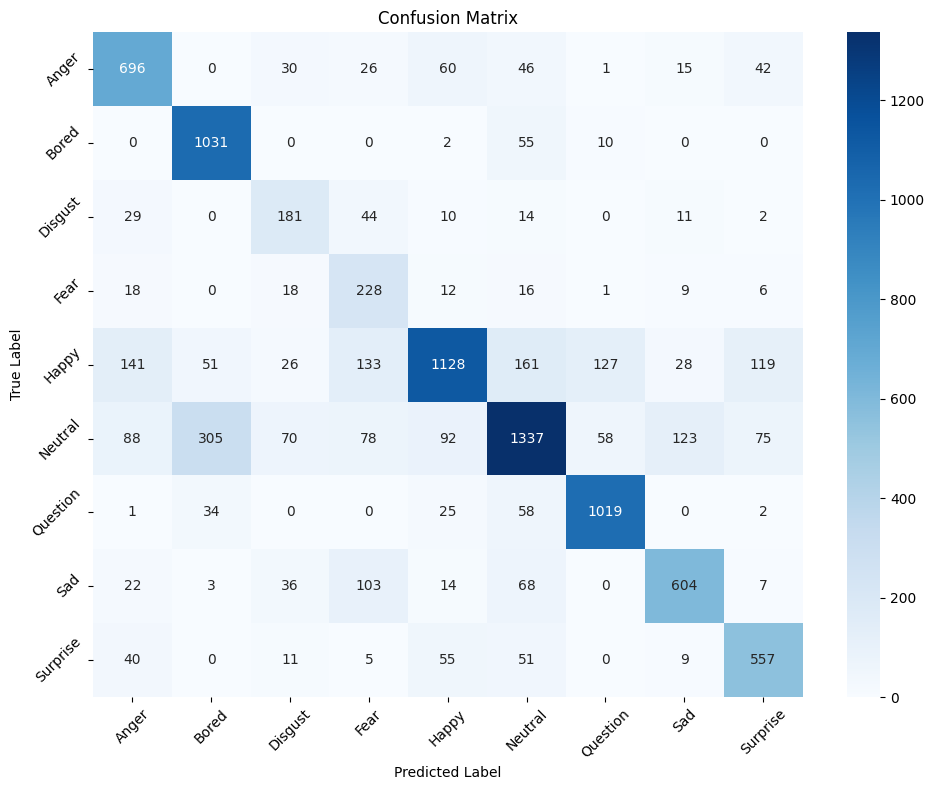

In [13]:
Pipeline.execute(
    model=model,
    labelmap=trainset.label_map,
    trainloader=trainloader,
    valloader=valloader,
    testloader=testloader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=num_epochs,
    model_name=model_name,
    patience=7
)